## Visualize model stats from the first run

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append("../refract")

In [3]:
# read results.csv
# index is first col
df = pd.read_csv('results.csv', index_col=0)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,column_name,broad_id,name,dose,screen_id,topFeature,feature_type,drug_category,moa_biomarkers,target,disease.area,indication,phase,bimodality_coef,Cor,hub_url,group,BM,x,y,mse,mse_se,r2,pearson,pert_name,pert_mfc_id,feature_name
0,BRD-A00055058-001-01-0::2.325889319::MTS004,BRD-A00055058-001-01-0,RS-0481,2.325889,MTS004,Exp_TMEM221 (ENSG00000188051),GE,targeted cancer,immunostimulant,NaN,NaN,NaN,Phase 2,0.342305,0.097898,RS-0481,NaN,NaN,0.0,0.0,0.094869,0.004144,-0.018933,-0.015118,RS-0481,BRD-A00055058-001-01-0,all
1,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00077618-236-07-6,8-bromo-cGMP,2.500000,HTS,MIRNA_hsa-miR-199a-5p,MIRNA,noncancer,PKA activator,PRKG1,NaN,NaN,Preclinical,0.278782,0.174359,8-bromo-cGMP,NaN,NaN,0.0,0.0,0.208471,0.008979,0.005022,0.081862,8-bromo-cGMP,BRD-A00077618-236-07-6,all
2,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00100033-001-08-9,nifurtimox,2.500000,HTS,CN_RNF216 (54476),CN,noncancer,DNA inhibitor,NaN,infectious disease,"Chagas disease, African trypanosomiasis",Launched,0.299739,0.060088,nifurtimox,NaN,NaN,0.0,0.0,0.155218,0.006667,-0.026878,-0.067851,nifurtimox,BRD-A00100033-001-08-9,all
3,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00218260-001-03-4,flutrimazole,2.500000,HTS,METHYL_TAF1C,METHYL,noncancer,sterol demethylase inhibitor,NaN,infectious disease,mycosis,Launched,0.281540,0.064324,flutrimazole,NaN,NaN,0.0,0.0,0.131215,0.005673,-0.011250,0.010085,flutrimazole,BRD-A00218260-001-03-4,all
4,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00520476-001-07-4,otenzepad,2.500000,HTS,DEM2_LCN1 (3933),DEMETER2_COM,noncancer,acetylcholine receptor antagonist,"CHRM1, CHRM2, CHRM3, CHRM4, CHRM5",NaN,NaN,Phase 3,0.300562,0.013887,otenzepad,NaN,NaN,0.0,0.0,0.126665,0.005456,-0.039234,-0.129225,otenzepad,BRD-A00520476-001-07-4,all


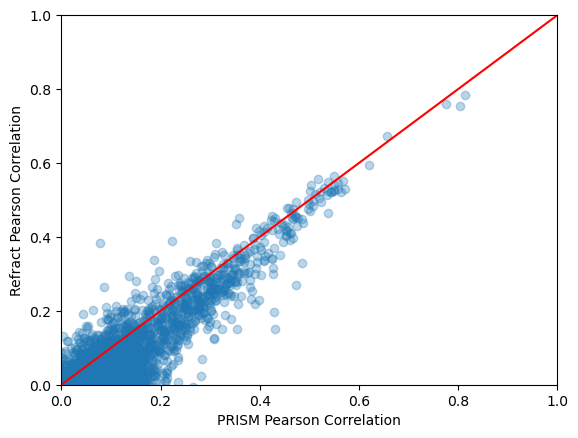

In [6]:
# scatter plot, x = Cor, y = pearson
# make x and y log scale
# alpha = 0.5
# x axis = "PRISM Pearson Correlation"
# y axis = "Refract Pearson Correlation"

# plot
plt.scatter(df.Cor, df.pearson, alpha=0.3)
plt.xlabel('PRISM Pearson Correlation')
plt.ylabel('Refract Pearson Correlation')
plt.xlim(0,1)
plt.ylim(0,1)

# plot an x = y line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, c="r")

(0.0, 1.0)

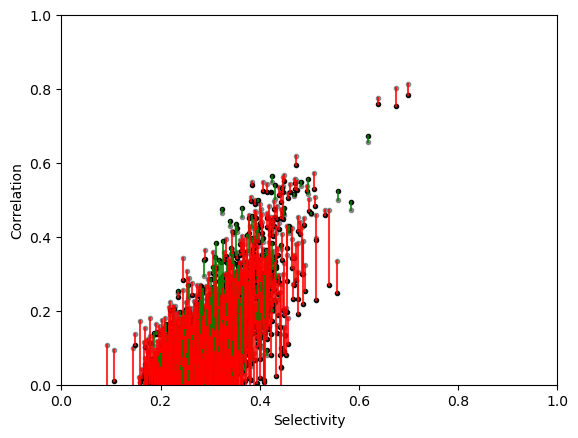

In [60]:
# Plot Selectivity vs correlation. 
# X axis = Selectivity
# Y axis = Correlation
# There are two correlation values for each compound (Cor, pearson)
# plot both of them on the same plot
# draw a line between the two points
# color the line green if pearson > Cor and red if pearson < Cor
# color the Cor points as light grey and the pearson points as dark grey
# plot scatter as a point

# plot lines between the two points
for i in range(len(df)):
    plt.plot([df.bimodality_coef[i], df.bimodality_coef[i]], [df.Cor[i], df.pearson[i]], c="green" if df.pearson[i] > df.Cor[i] else "red", alpha=0.8)

# plot
plt.scatter(df.bimodality_coef, df.Cor, c="grey", alpha=0.9, marker=".")
plt.scatter(df.bimodality_coef, df.pearson, c="black", alpha=0.9, marker=".")
plt.xlabel('Selectivity')
plt.ylabel('Correlation')
plt.xlim(0,1)
plt.ylim(0,1)



In [61]:
# whats the mean improvement?

df["improvement"] = df.pearson - df.Cor

(0.0, 1.0)

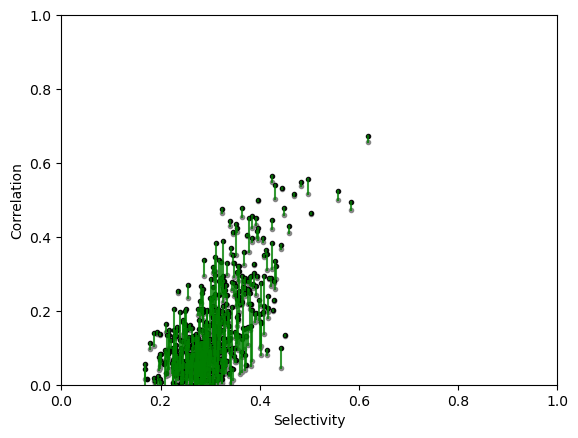

In [74]:
# Plot Selectivity vs correlation. 
# X axis = Selectivity
# Y axis = Correlation
# There are two correlation values for each compound (Cor, pearson)
# plot both of them on the same plot
# draw a line between the two points
# color the line green if pearson > Cor and red if pearson < Cor
# color the Cor points as light grey and the pearson points as dark grey
# plot scatter as a point

# just plot for improved
only_improved = df.loc[df.improvement > 0]

# plot lines between the two points
for i in range(len(only_improved)):
    plt.plot([only_improved.bimodality_coef.values[i], only_improved.bimodality_coef.values[i]], [only_improved.Cor.values[i], only_improved.pearson.values[i]], c="green", alpha=0.8)

# plot
plt.scatter(only_improved.bimodality_coef, only_improved.Cor, c="grey", alpha=0.9, marker=".")
plt.scatter(only_improved.bimodality_coef, only_improved.pearson, c="black", alpha=0.9, marker=".")
plt.xlabel('Selectivity')
plt.ylabel('Correlation')
plt.xlim(0,1)
plt.ylim(0,1)



In [70]:
only_improved.pearson

36      0.020769
55      0.044087
78      0.055028
91      0.042760
106     0.040600
          ...   
3818    0.053240
3819    0.045651
3827    0.036520
3828    0.127522
3835    0.429807
Name: pearson, Length: 551, dtype: float64

Text(0.05, 0.9, '14.34% improved')

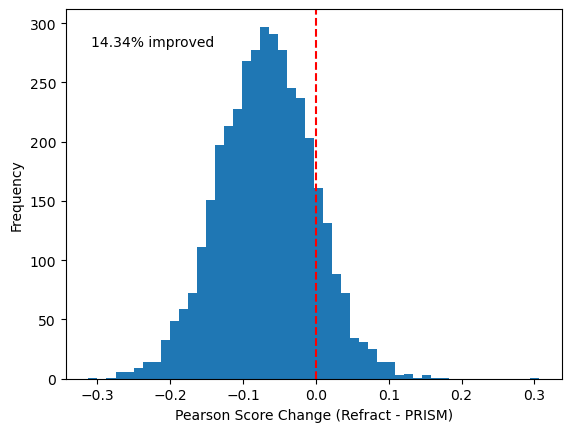

In [78]:
# plot histogram of improvement
plt.hist(df.improvement, bins=50)
# add axis title
plt.xlabel('Pearson Score Change (Refract - PRISM)')
plt.ylabel('Frequency')
# vertical dotted red line at X = 0
plt.axvline(x=0, c="red", linestyle="dashed")
# print the percent of compounds that improved on the plot
plt.text(0.05, 0.9, str(round(len(only_improved)/len(df)*100, 2)) + "% improved", transform=plt.gca().transAxes)

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  5.,  4.,  7., 10.,  9.,
        13., 24., 14., 11., 12., 12.,  5.,  9.,  4.,  0.,  1.,  2.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.15448915, -0.14526526, -0.13604137, -0.12681749, -0.1175936 ,
        -0.10836972, -0.09914583, -0.08992195, -0.08069806, -0.07147418,
        -0.06225029, -0.0530264 , -0.04380252, -0.03457863, -0.02535475,
        -0.01613086, -0.00690698,  0.00231691,  0.0115408 ,  0.02076468,
         0.02998857,  0.03921245,  0.04843634,  0.05766022,  0.06688411,
         0.07610799,  0.08533188,  0.09455577,  0.10377965,  0.11300354,
         0.12222742,  0.13145131,  0.14067519,  0.14989908,  0.15912297,
         0.16834685,  0.17757074,  0.18679462,  0.19601851,  0.20524239,
         0.21446628,  0.22369017,  0.23291405,  0.24213794,  0.25136182,
         0.26058571,  0.26980959,  0.27903348,  0.28825736,

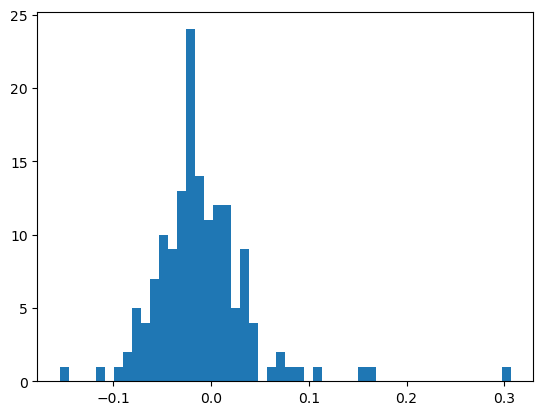

In [9]:
# whats the distirbution of improvement where Refract > .3? 
temp = df[df.pearson > 0.3]
plt.hist(temp.improvement, bins=50)

In [10]:
# which compounds have the greatest magnitude of improvement?
improvement_ranked = df.sort_values(by="improvement", ascending=False)

In [79]:
improvement_ranked.loc[:, ["name", "drug_category", "bimodality_coef", "Cor", "pearson", "improvement"]].head(10)

,name,drug_category,bimodality_coef,Cor,pearson,improvement
241,puromycin,noncancer,0.312074,0.077110,0.383815,0.306705
3673,cladribine,chemo,0.365606,0.085927,0.264999,0.179072
2383,palbociclib,targeted cancer,0.326246,0.222904,0.390099,0.167196
3421,alvespimycin,targeted cancer,0.407682,0.136458,0.293957,0.157499
2226,zotarolimus,noncancer,0.318575,0.185837,0.338756,0.152919
266,florfenicol,noncancer,0.330427,0.042973,0.191702,0.148729
198,PF-06463922,targeted cancer,0.384674,0.062835,0.200988,0.138153
1520,ETP-46464,targeted cancer,0.317804,0.150655,0.281532,0.130877
78,ioxilan,noncancer,0.167913,-0.074592,0.055028,0.129619
3627,torcitabine,noncancer,0.273207,0.002887,0.132355,0.129468


In [12]:
# number of compounds with Cor > .2
print(len(df[df.Cor > 0.2]))
# number of compounds with pearson > .2
print(len(df[df.pearson > 0.2]))

514
390


## Medium-deep dive into: zotarolimus

In [13]:
# moad model cv data
import pickle 

with open("spot_check_data/zotarolimus/zotarolimus_all/BRD-K46843573-001-01-9_all_2.5.pkl", "rb") as f:
    drug = pickle.load(f)

In [14]:
from datasets import ResponseSet, FeatureSet


In [15]:
response_path = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_repurposing/updated_responses/zotarolimus.csv"
feature_dir = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_public-22q1-305b_v24"

In [16]:
# load X and y
response_set = ResponseSet(response_path)
response_set.load_response_table()

feature_set = FeatureSet(feature_dir)
feature_set.load_concatenated_feature_tables()


In [17]:
# get unique runs
LFC = response_set.LFC
runs = LFC[["pert_name", "dose", "pert_mfc_id"]].drop_duplicates()

In [18]:
pert_name = runs.pert_name.values[0]
dose = runs.dose.values[0]
pert_mfc_id = runs.pert_mfc_id.values[0]

In [19]:
X, y = response_set.get_joined_features(
    pert_name=pert_name,
    pert_mfc_id=pert_mfc_id,
    dose=dose,
    feature_set=feature_set,
    feature_name="all",
)

In [20]:
# compute shap values for cv model
import shap

/home/nphillips/miniconda3/envs/corlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
from tqdm import tqdm

In [22]:
shap_values = []
feature_importances = []
for outer_fold in tqdm(drug):
    for idx, model in enumerate(outer_fold["models"]):
        print(idx)
        imputer = outer_fold["imputers"][idx]
        X_ordered = X.loc[:, imputer.feature_names_in_]
        X_imp = imputer.transform(X_ordered)
        # get shap values
        explainer = shap.TreeExplainer(model)
        shap_value = explainer.shap_values(X_imp)
        feature_importances.append(model.feature_importances_)
        shap_values.append(shap_value)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3


 20%|██        | 1/5 [00:13<00:54, 13.69s/it]

0
1
2
3


 40%|████      | 2/5 [00:26<00:39, 13.07s/it]

0
1
2
3


 60%|██████    | 3/5 [00:39<00:26, 13.14s/it]

0
1
2
3


 80%|████████  | 4/5 [00:51<00:12, 12.66s/it]

0
1
2
3


100%|██████████| 5/5 [01:03<00:00, 12.61s/it]


In [23]:
# concat shap values
shap_values = np.mean(shap_values, axis=0)

In [24]:
# order X by columns
X_ordered = X.loc[:, imputer.feature_names_in_]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


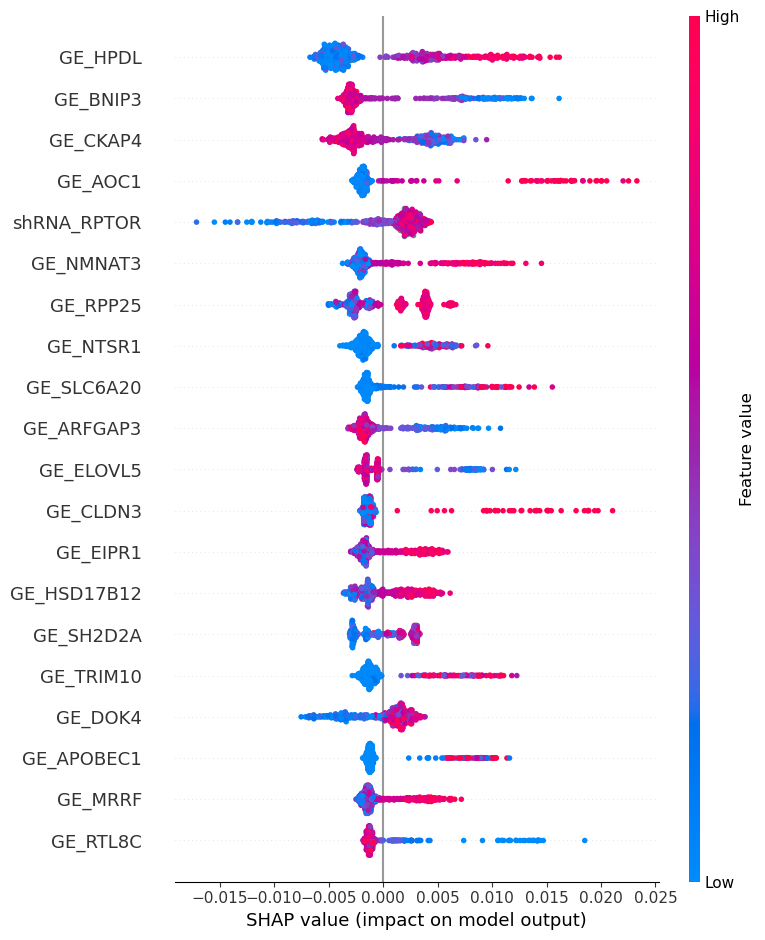

In [25]:
# plot shap values
shap.summary_plot(shap_values, X_ordered, feature_names=X_ordered.columns)

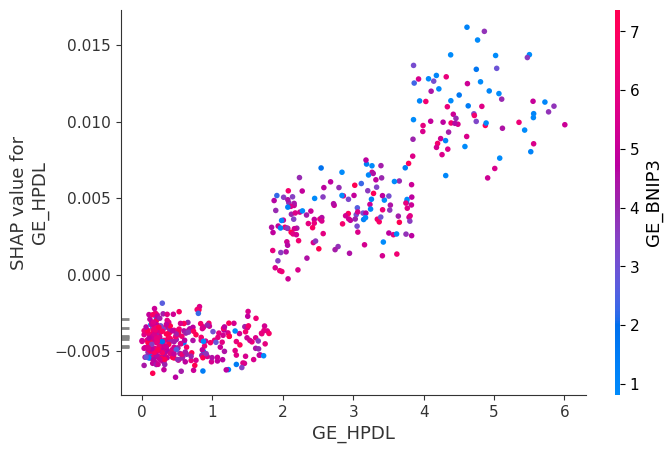

In [26]:
shap.dependence_plot("GE_HPDL", shap_values, X_ordered, feature_names=X_ordered.columns, interaction_index="GE_BNIP3")

# Another: florfenicol

In [27]:
# moad model cv data
import pickle 

with open("spot_check_data/florfenicol/florfenicol_all/BRD-A30886737-001-02-9_all_2.5.pkl", "rb") as f:
    drug = pickle.load(f)

In [28]:
response_path = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_repurposing/updated_responses/florfenicol.csv"

In [29]:
# load X and y
response_set = ResponseSet(response_path)
response_set.load_response_table()


In [30]:
LFC = response_set.LFC
runs = LFC[["pert_name", "dose", "pert_mfc_id"]].drop_duplicates()

In [31]:
pert_name = runs.pert_name.values[0]
dose = runs.dose.values[0]
pert_mfc_id = runs.pert_mfc_id.values[0]

In [32]:
X, y = response_set.get_joined_features(
    pert_name=pert_name,
    pert_mfc_id=pert_mfc_id,
    dose=dose,
    feature_set=feature_set,
    feature_name="all",
)

In [33]:
shap_values = []
feature_importances = []
for outer_fold in tqdm(drug):
    for idx, model in enumerate(outer_fold["models"]):
        print(idx)
        imputer = outer_fold["imputers"][idx]
        X_ordered = X.loc[:, imputer.feature_names_in_]
        X_imp = imputer.transform(X_ordered)
        # get shap values
        explainer = shap.TreeExplainer(model)
        shap_value = explainer.shap_values(X_imp)
        feature_importances.append(model.feature_importances_)
        shap_values.append(shap_value)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3


 20%|██        | 1/5 [00:13<00:53, 13.41s/it]

0
1
2
3


 40%|████      | 2/5 [00:26<00:39, 13.28s/it]

0
1
2
3


 60%|██████    | 3/5 [00:38<00:25, 12.56s/it]

0
1
2
3


 80%|████████  | 4/5 [00:49<00:11, 11.98s/it]

0
1
2
3


100%|██████████| 5/5 [01:00<00:00, 12.04s/it]


In [34]:
# concat shap values
shap_values = np.mean(shap_values, axis=0)

In [35]:
shap_values.shape

(539, 134713)

In [36]:
# order X by columns
X_ordered = X.loc[:, imputer.feature_names_in_]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


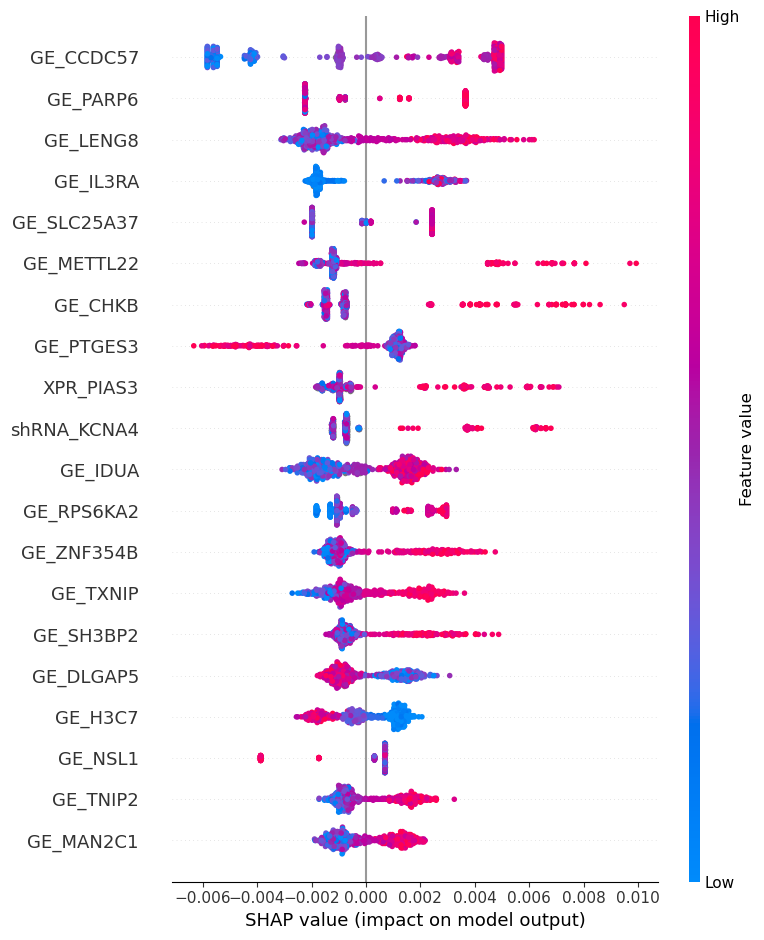

In [37]:
# plot shap values
shap.summary_plot(shap_values, X_ordered, feature_names=X_ordered.columns)

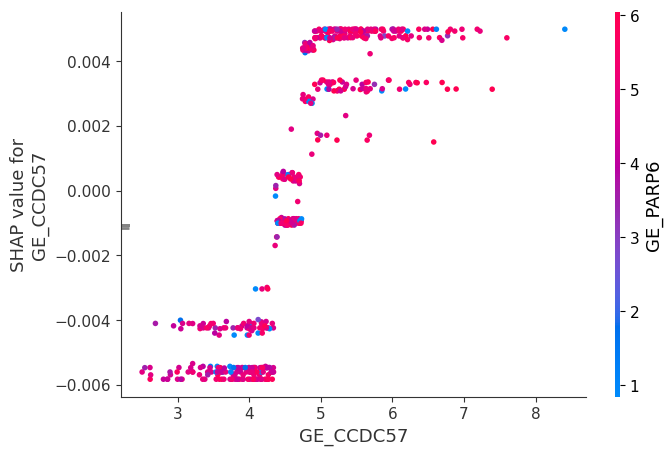

In [38]:
shap.dependence_plot("GE_CCDC57", shap_values, X_ordered, feature_names=X_ordered.columns, interaction_index="GE_PARP6")

## Another: ETP-46464

In [39]:
# moad model cv data
import pickle 

with open("spot_check_data/ETP-46464/ETP-46464_all/BRD-K24556407-001-02-3_all_2.5.pkl", "rb") as f:
    drug = pickle.load(f)

response_path = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_repurposing/updated_responses/ETP-46464.csv"

# load X and y
response_set = ResponseSet(response_path)
response_set.load_response_table()

LFC = response_set.LFC
runs = LFC[["pert_name", "dose", "pert_mfc_id"]].drop_duplicates()

pert_name = runs.pert_name.values[0]
dose = runs.dose.values[0]
pert_mfc_id = runs.pert_mfc_id.values[0]

X, y = response_set.get_joined_features(
    pert_name=pert_name,
    pert_mfc_id=pert_mfc_id,
    dose=dose,
    feature_set=feature_set,
    feature_name="all",
)

In [40]:
shap_values = []
feature_importances = []
for outer_fold in tqdm(drug):
    for idx, model in enumerate(outer_fold["models"]):
        print(idx)
        imputer = outer_fold["imputers"][idx]
        X_ordered = X.loc[:, imputer.feature_names_in_]
        X_imp = imputer.transform(X_ordered)
        # get shap values
        explainer = shap.TreeExplainer(model)
        shap_value = explainer.shap_values(X_imp)
        feature_importances.append(model.feature_importances_)
        shap_values.append(shap_value)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3


 20%|██        | 1/5 [00:12<00:51, 12.88s/it]

0
1
2
3


 40%|████      | 2/5 [00:25<00:38, 12.72s/it]

0
1
2
3


 60%|██████    | 3/5 [00:36<00:24, 12.17s/it]

0
1
2
3


 80%|████████  | 4/5 [00:46<00:11, 11.12s/it]

0
1
2
3


100%|██████████| 5/5 [00:57<00:00, 11.59s/it]


In [41]:
# concat shap values
shap_values = np.mean(shap_values, axis=0)

# order X by columns
X_ordered = X.loc[:, imputer.feature_names_in_]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


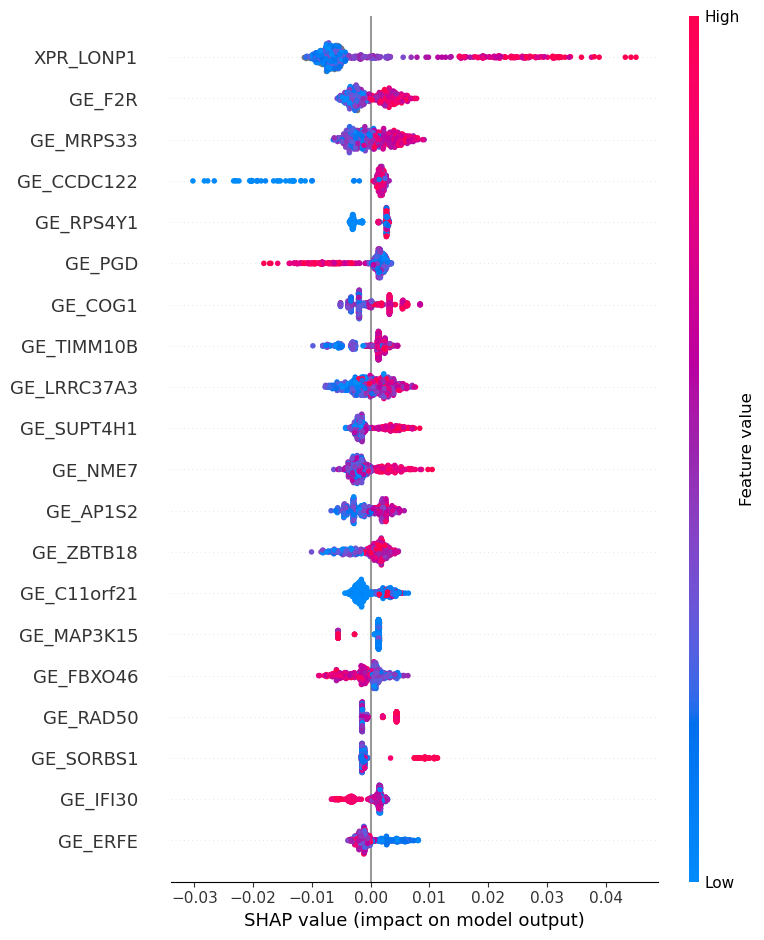

In [42]:
# plot shap values
shap.summary_plot(shap_values, X_ordered, feature_names=X_ordered.columns, )

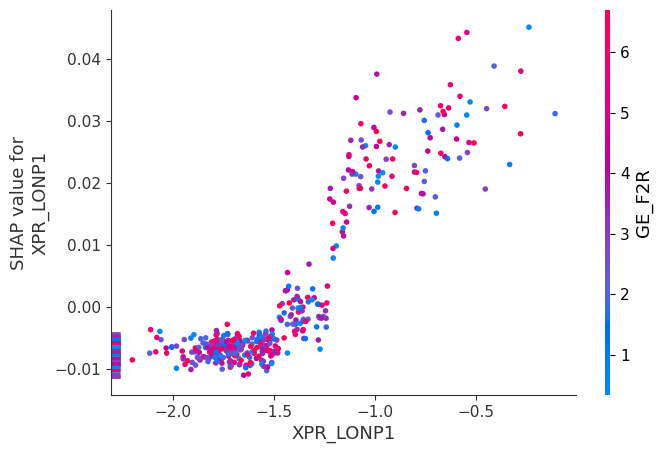

In [43]:
shap.dependence_plot("XPR_LONP1", shap_values, X_ordered, feature_names=X_ordered.columns, interaction_index="GE_F2R")

## Another test: puromycin

In [44]:
# moad model cv data
import pickle 
from tqdm import tqdm
import shap

with open("spot_check_data/puromycin/puromycin_all/BRD-A28970875-300-04-9_all_2.5.pkl", "rb") as f:
    drug = pickle.load(f)

response_path = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_repurposing/updated_responses/puromycin.csv"

# load X and y
response_set = ResponseSet(response_path)
response_set.load_response_table()

LFC = response_set.LFC
runs = LFC[["pert_name", "dose", "pert_mfc_id"]].drop_duplicates()

pert_name = runs.pert_name.values[0]
dose = runs.dose.values[0]
pert_mfc_id = runs.pert_mfc_id.values[0]

X, y = response_set.get_joined_features(
    pert_name=pert_name,
    pert_mfc_id=pert_mfc_id,
    dose=dose,
    feature_set=feature_set,
    feature_name="all",
)

In [45]:
shap_values = []
feature_importances = []
for outer_fold in tqdm(drug):
    for idx, model in enumerate(outer_fold["models"]):
        print(idx)
        imputer = outer_fold["imputers"][idx]
        X_ordered = X.loc[:, imputer.feature_names_in_]
        X_imp = imputer.transform(X_ordered)
        # get shap values
        explainer = shap.TreeExplainer(model)
        shap_value = explainer.shap_values(X_imp)
        feature_importances.append(model.feature_importances_)
        shap_values.append(shap_value)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3


 20%|██        | 1/5 [00:12<00:48, 12.11s/it]

0
1
2
3


 40%|████      | 2/5 [00:23<00:34, 11.63s/it]

0
1
2
3


 60%|██████    | 3/5 [00:33<00:21, 10.94s/it]

0
1
2
3


 80%|████████  | 4/5 [00:45<00:11, 11.24s/it]

0
1
2
3


100%|██████████| 5/5 [00:55<00:00, 11.09s/it]


In [46]:
# concat shap values
shap_values = np.mean(shap_values, axis=0)

# order X by columns
X_ordered = X.loc[:, imputer.feature_names_in_]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


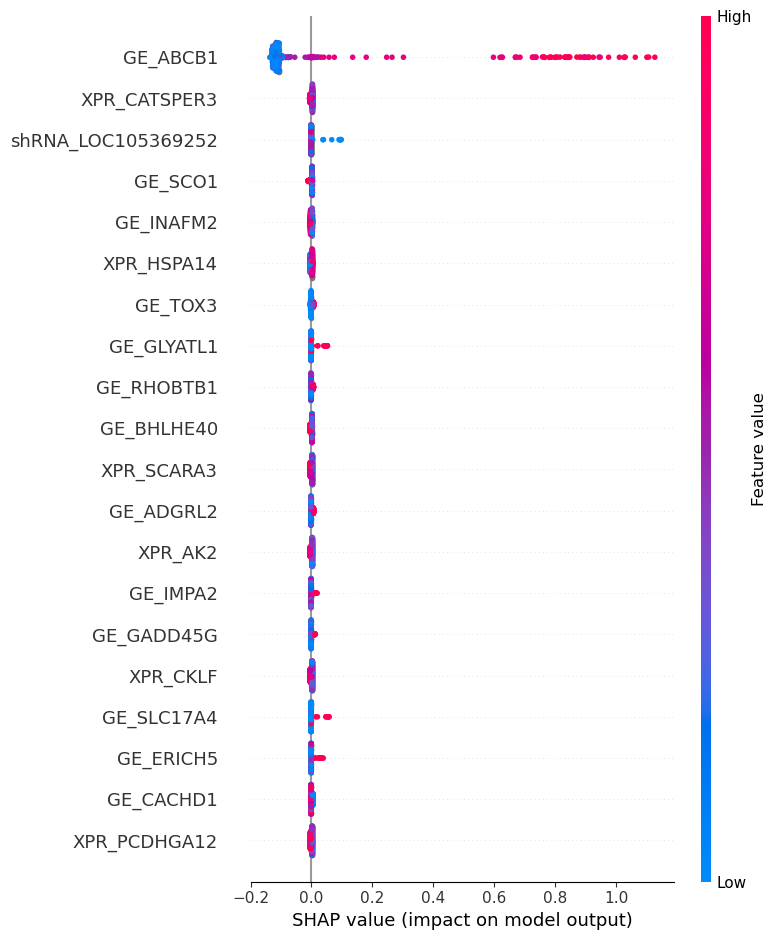

In [47]:
# plot shap values
shap.summary_plot(shap_values, X_ordered, feature_names=X_ordered.columns)

# Another: palbociclib

In [48]:
# moad model cv data
import pickle 
from tqdm import tqdm
import shap

with open("spot_check_data/palbociclib/palbociclib_all/BRD-K51313569-003-03-3_all_2.5.pkl", "rb") as f:
    drug = pickle.load(f)

response_path = "/mnt/c/Users/nick/Desktop/sherlock_copy/depmap_repurposing/updated_responses/palbociclib.csv"

# load X and y
response_set = ResponseSet(response_path)
response_set.load_response_table()

LFC = response_set.LFC
runs = LFC[["pert_name", "dose", "pert_mfc_id"]].drop_duplicates()

pert_name = runs.pert_name.values[0]
dose = runs.dose.values[0]
pert_mfc_id = runs.pert_mfc_id.values[0]

X, y = response_set.get_joined_features(
    pert_name=pert_name,
    pert_mfc_id=pert_mfc_id,
    dose=dose,
    feature_set=feature_set,
    feature_name="all",
)

In [49]:
shap_values = []
feature_importances = []
expected_values = []
for outer_fold in tqdm(drug):
    for idx, model in enumerate(outer_fold["models"]):
        print(idx)
        imputer = outer_fold["imputers"][idx]
        X_ordered = X.loc[:, imputer.feature_names_in_]
        X_imp = imputer.transform(X_ordered)
        # get shap values
        explainer = shap.TreeExplainer(model)
        shap_value = explainer.shap_values(X_imp)
        feature_importances.append(model.feature_importances_)
        shap_values.append(shap_value)
        expected_values.append(explainer.expected_value[0])

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3


 20%|██        | 1/5 [00:13<00:54, 13.69s/it]

0
1
2
3


 40%|████      | 2/5 [00:24<00:36, 12.12s/it]

0
1
2
3


 60%|██████    | 3/5 [00:35<00:23, 11.63s/it]

0
1
2
3


 80%|████████  | 4/5 [00:46<00:11, 11.46s/it]

0
1
2
3


100%|██████████| 5/5 [00:57<00:00, 11.58s/it]


In [50]:
# concat shap values
shap_values = np.mean(shap_values, axis=0)

# order X by columns
X_ordered = X.loc[:, imputer.feature_names_in_]

# expected value
expected_value = np.mean(expected_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


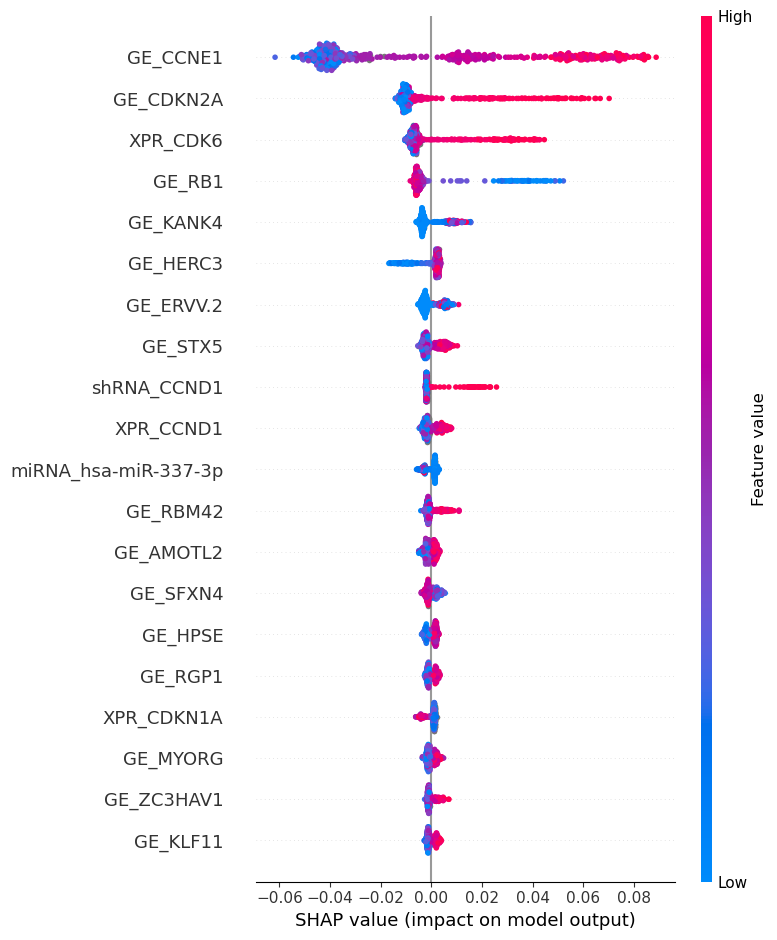

In [51]:
# plot shap values
shap.summary_plot(shap_values, X_ordered, feature_names=X_ordered.columns)

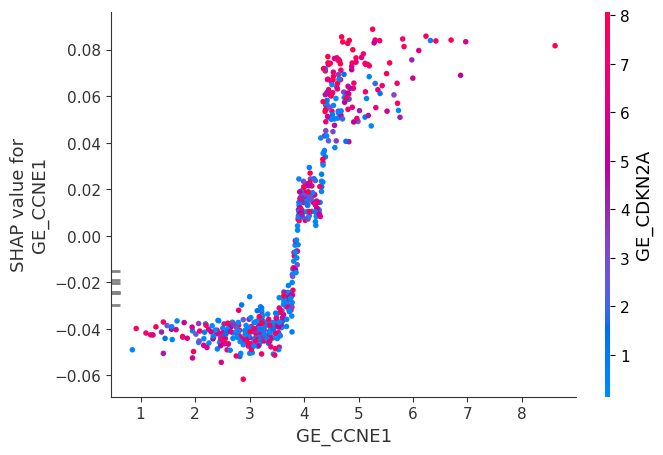

In [52]:
shap.dependence_plot("GE_CCNE1", shap_values, X_ordered, feature_names=X_ordered.columns, interaction_index="GE_CDKN2A")